In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential

In [6]:
#importing the data
data=pd.read_csv("/content/data.csv")
print(data.head)
print(data.describe)

<bound method NDFrame.head of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  con

In [7]:
data.isnull().sum().sum()

0

In [8]:
y=data["price"]

In [9]:
df=data

In [10]:
col=["price","date","street","city","statezip","country"]

In [11]:
x=df.drop(col,axis=1)

In [12]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [13]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,shuffle=True)
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
2877,3.0,2.25,1820,7326,2.0,0,0,3,1820,0,1983,2009
1068,5.0,2.00,1930,6120,1.5,0,0,3,1930,0,1941,1969
4112,3.0,1.75,1140,10400,1.0,0,0,4,1140,0,1983,0
2340,4.0,2.50,3280,6181,2.0,0,0,3,3280,0,2001,0
3843,3.0,2.25,1320,1800,2.0,0,0,3,1320,0,1994,0


In [14]:
x_train.shape

(3450, 12)

In [15]:
#scaling the y_train values
y_train=y_train/max(y_train)
y_test=y_test/max(y_test)

In [17]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [18]:
x_train

array([[-0.4402218 ,  0.11045493, -0.3338111 , ..., -0.67927447,
         0.40157005,  1.21523452],
       [ 1.75135858, -0.20843169, -0.21721242, ..., -0.67927447,
        -1.0127733 ,  1.17445758],
       [-0.4402218 , -0.52731832, -1.05460289, ..., -0.67927447,
         0.40157005, -0.83278755],
       ...,
       [-0.4402218 , -0.84620495, -0.88500482, ..., -0.67927447,
        -0.27192679,  1.2142151 ],
       [-0.4402218 , -0.52731832, -0.25961194, ..., -0.67927447,
        -0.17090226, -0.83278755],
       [-0.4402218 ,  0.42934156, -0.25961194, ..., -0.32902212,
         1.04139204, -0.83278755]])

In [30]:
#model  creation
model=Sequential()
model.add(Dense(12,activation="relu",input_shape=(12,)))
model.add(Dense(30,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [32]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=True)

Epoch 1/100
87/87 [==============================] - 2s 6ms/step - loss: 0.0492 - mae: 0.1507 - val_loss: 5.5668e-04 - val_mae: 0.0171
Epoch 2/100
87/87 [==============================] - 0s 5ms/step - loss: 9.6371e-04 - mae: 0.0169 - val_loss: 4.1210e-04 - val_mae: 0.0152
Epoch 3/100
87/87 [==============================] - 0s 5ms/step - loss: 8.9359e-04 - mae: 0.0160 - val_loss: 3.8741e-04 - val_mae: 0.0148
Epoch 4/100
87/87 [==============================] - 0s 5ms/step - loss: 8.6783e-04 - mae: 0.0156 - val_loss: 3.7117e-04 - val_mae: 0.0145
Epoch 5/100
87/87 [==============================] - 1s 7ms/step - loss: 8.4592e-04 - mae: 0.0152 - val_loss: 3.5508e-04 - val_mae: 0.0142
Epoch 6/100
87/87 [==============================] - 1s 7ms/step - loss: 8.2575e-04 - mae: 0.0148 - val_loss: 3.3923e-04 - val_mae: 0.0138
Epoch 7/100
87/87 [==============================] - 1s 8ms/step - loss: 8.0656e-04 - mae: 0.0144 - val_loss: 3.2296e-04 - val_mae: 0.0134
Epoch 8/100
87/87 [============

In [33]:
model.evaluate(x_train,y_train)

108/108 [==============================] - 0s 4ms/step - loss: 3.3002e-04 - mae: 0.0064


[0.00033001770498231053, 0.006406668573617935]

In [34]:
y_pred=model.predict(x_test)
y_pred

36/36 [==============================] - 0s 2ms/step


array([[0.05276033],
       [0.0206026 ],
       [0.01582307],
       ...,
       [0.03031785],
       [0.00828699],
       [0.03410952]], dtype=float32)

In [35]:
from sklearn.metrics import mean_absolute_error

# Assuming y_test contains the true continuous values and y_pred contains the predicted values
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.055113647205603855


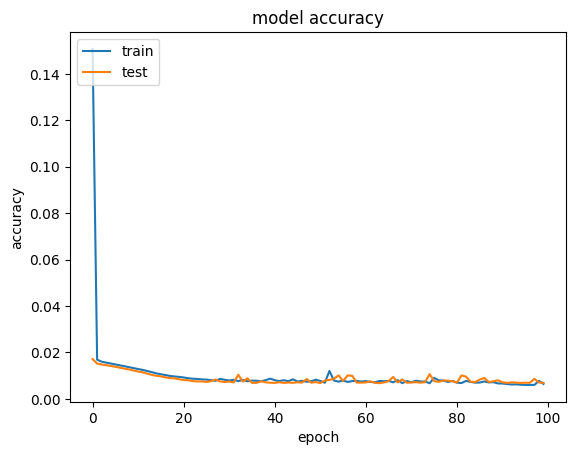

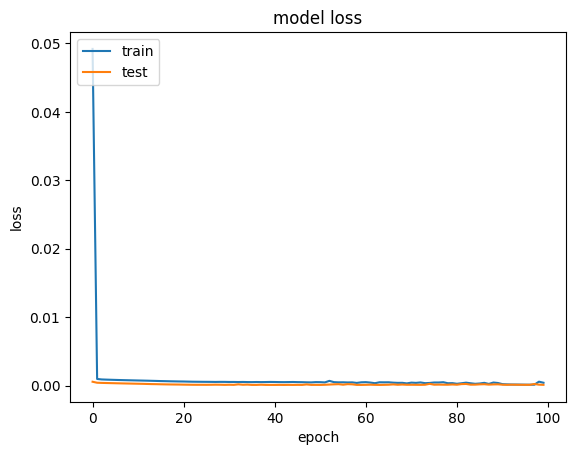

In [36]:
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()